In [38]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [39]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [40]:
X_train.shape , X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [41]:
def print_sample(X,idx):
    plt.matshow(X[idx])

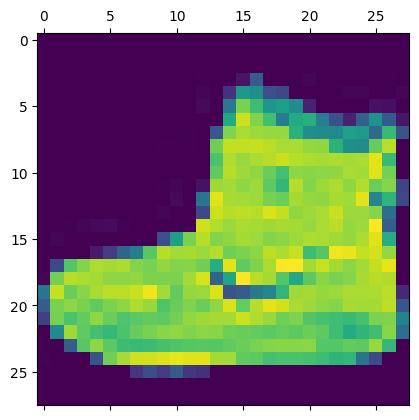

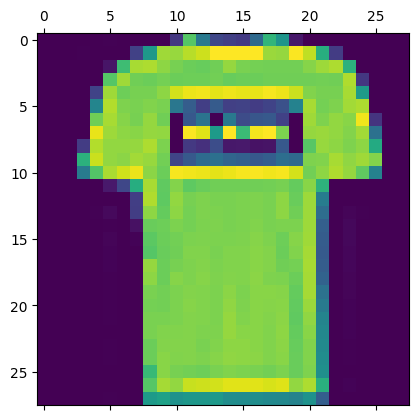

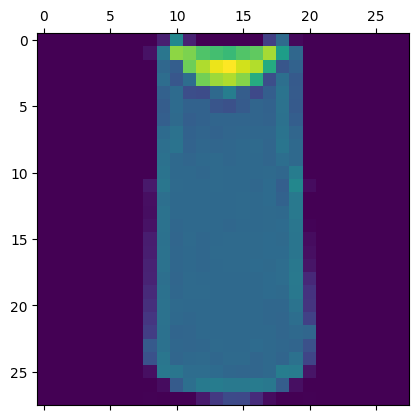

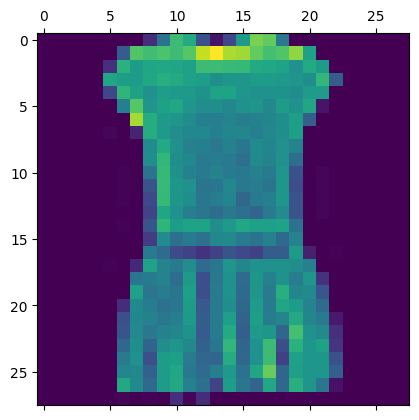

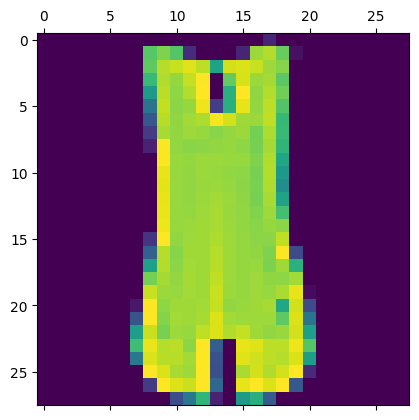

In [42]:
for i in range(5):
    print_sample(X_train,i)

In [43]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [44]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [66]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32 , kernel_size=(4,5) , activation='relu' , strides=1 , padding='valid', input_shape = (28,28,1)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=64 , kernel_size=(4,5) , activation='relu' , strides=1 , padding='valid'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(10,activation='softmax'),
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [67]:
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5116 - accuracy: 0.8125
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3391 - accuracy: 0.8768
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2920 - accuracy: 0.8917
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2609 - accuracy: 0.9031
Epoch 5/10
1107/1875 [================>.............] - ETA: 6s - loss: 0.2331 - accuracy: 0.9118

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test_scaled , y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2658 - accuracy: 0.9086


[0.2658482491970062, 0.9085999727249146]

In [ ]:
y_pred = model.predict(X_test_scaled)

313/313 [==============================] - 2s 5ms/step


In [ ]:
y_pred = np.array([np.argmax(i) for i in y_pred])

In [ ]:
y_pred

array([9, 2, 1, ..., 8, 1, 7], dtype=int64)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9086